In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook

# Scikit-learn Soup to Nuts: Developing a Machine-Learning Workflow

In this lecture we will discuss the tools and steps necessary to build a successful machine-learning model.

<center> Adam A Miller  
CIERA/Northwestern & Adler Planetarium  
(c) 2017 Nov 2</center>

### Machine Learning

&nbsp;&nbsp;&nbsp;&nbsp; fundamentally concerned with the problem of classification   
&nbsp;&nbsp;&nbsp;&nbsp; *particularly in regime of large dimensional data sets*  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (methods can be extended to regression)  
  
&nbsp;&nbsp;&nbsp;&nbsp; (glorified) Pattern Matching  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; *a slight over-simplification* 

In other words, be careful about over-interpreting the "learning"...

### Terminology

&nbsp;&nbsp;&nbsp;&nbsp; **Features**   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; measured properties of objects in the data set  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; can be numerical or categorical (e.g., red vs. blue)

&nbsp;&nbsp;&nbsp;&nbsp; **Labels**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; target classification or regression variable (to be predicted)

Standard ([supervised](https://en.wikipedia.org/wiki/Supervised_learning)) ML goal: 
  1. **Train** Develop a mapping between *features* and *labels*
  2. **Test** Evaluate performance on labeled data excluded from training
  3. **Predict** Apply the model to sources with unknown labels

Today I will not discuss [unsupervised machine learning](https://en.wikipedia.org/wiki/Unsupervised_learning). Primarily because we do not have time, but also because I have not seen a single useful application of these techniques in my own science.

In brief, unsupervised learning ignores any labels that may be available and instead attempts to cluster sources based on their similarity in the multidimensional feature space. However, once the clusters have been identified there is no mathematical method for measuring the quality of the clusters (and hence my feelings that these methods aren't that useful).

<center>
<img src="images/ML_summary.png" width=850cm>
</center>

### Question 1

Why is the step with the test data necessary?

[Take a few min to dicuss with your partner]

With this simple picture in mind, let's get started.

Today we will be doing everything with the [scikit-learn](http://scikit-learn.org/stable/) package in `python`.

`scikit-learn` is amazing! It has access to just about everything needed to construct the ML workflow, and often there is excellent documentation as well. We will now demonstrate the simplicity of sklearn by building a ML model (in only 4 lines of code!)

In [5]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
iris = load_iris()
rf_clf = RandomForestClassifier().fit(iris.data, iris.target)

## Bang

Just like that - you're done. 

Now you can all go home.

As a very important aside - allow me a moment on my soapbox to advise caution regarding the simplicity of `scikit-learn`: the package is so user friendly, and documentation so good, that it is not just easy to build a model, but it is also incredibly easy to become over confident in the model. Generally speaking, ML models are highly subject to noise and training-set biases and the simplicity of `scikit-learn` can consistently lead to a few lines of code that appear to produce outstanding results.

This is the first (but it will not be the last) time that I will implore you to **worry about the data**

On to building a full pipeline...

## 1. Data Preparation

As ML is a data-driven method, the first, and arguably most important step is to curate the data.

  1. Query, observe, simulate, etc. (i.e. collect the observations)
  2. Select features to be used in the model
  3. Determine "ground truth" (i.e. *labels*) for the training set 

Beyond these initial considerations, additional setps to consider include:  

&nbsp;&nbsp; 4. Convert categorical features  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; e.g., male, female, male, male $\rightarrow$ [0, 1, 0, 0]  
&nbsp;&nbsp; 5. [Impute](https://en.wikipedia.org/wiki/Imputation_(statistics) (or discard) missing data  
&nbsp;&nbsp; 6. Feature normalization  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; typically only necessary for certain ML models  
&nbsp;&nbsp; 7. Visualize the data   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; a critical step for all data-science applications  

and of course, don't forget...

# Worry About the Data

Today we will work with the famous [iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set), which has the advantage of being small and understandable, but as a result avoids many of the trappings of dealing with real world data. 

There are 3 classes of iris flower: setosa, virginica, and versicolor.

For each flower, 4 features have been measured: petal length, petal width, sepal length, and sepal width.

We will use [`seaborn`](https://seaborn.pydata.org) to visualize the data (but all subsequent work will be in `scikit-learn`).

In [34]:
xkcd_colors = ["windows blue", "amber", "slate"]

def infer_cmap(color):
    xkcd_colors = ["windows blue", "amber", "slate"]
    hues = sns.xkcd_palette(xkcd_colors)
    if color == hues[0]:
        return sns.light_palette(hues[0], as_cmap=True)
    elif color == hues[1]:
        return sns.light_palette(hues[1], as_cmap=True)
    elif color == hues[2]:
        return sns.light_palette(hues[2], as_cmap=True)

def kde_color_plot(x, y, **kwargs):
    cmap = infer_cmap(kwargs['color'])
    ax = sns.kdeplot(x, y, shade=True, shade_lowest=False, cmap=cmap, **kwargs)
    return ax

<IPython.core.display.Javascript object>


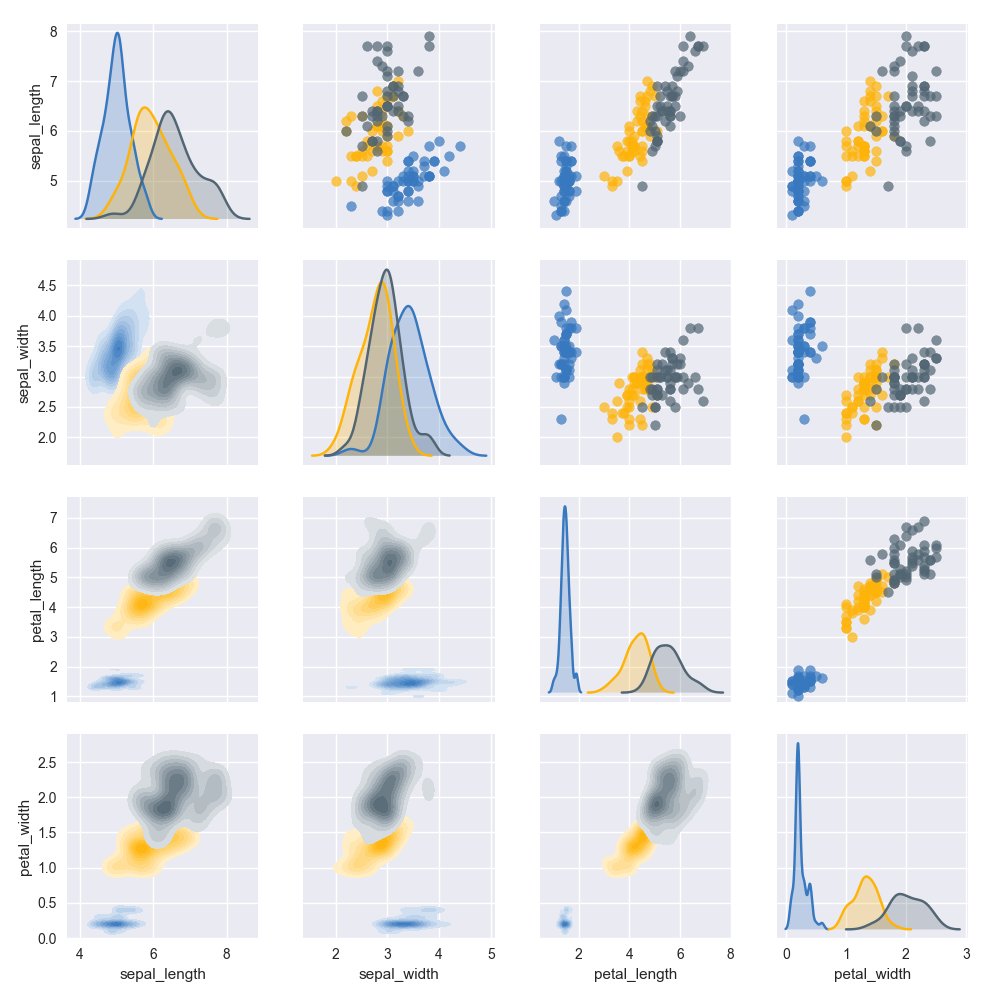

/Users/adamamiller/miniconda3/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


In [35]:
g = sns.PairGrid(iris_df, hue='species', 
                 vars=['sepal_length','sepal_width','petal_length','petal_width'], 
                 palette=sns.xkcd_palette(xkcd_colors), diag_sharey=False)
g = g.map_upper(plt.scatter, alpha=0.7)
g = g.map_lower(kde_color_plot)
g = g.map_diag(sns.kdeplot, shade=True)

In brief, these corner plots show that the data are fairly well separated, though there is some overlap between the virginica and versicolor species.

## 2. Feature Engineering

[This step may need to be repeated]

Add new features (if necessary)  
&nbsp;&nbsp;&nbsp;&nbsp; Utilize domain knowledge to create/compute new features  
&nbsp;&nbsp;&nbsp;&nbsp; e.g., sepal_length/petal_length may be more informative than features alone

Remove noisy/uniformative features (if necessary)  
&nbsp;&nbsp;&nbsp;&nbsp; [Feature importance can be measured](http://scikit-learn.org/stable/modules/ensemble.html#feature-importance-evaluation) via Random Forest  
&nbsp;&nbsp;&nbsp;&nbsp; [Forward/backward feature selection](https://www.cs.cmu.edu/~kdeng/thesis/feature.pdf) can thin feature set

In this case we have only 4 features, so we will proceed under the assumption that the feature set need not be thinned

## 3. Model Selection

[This step may need to be repeated]

Following the organization of the data and any appropriate feature engineering, the practitioner must then select an ML algorithm.

Every problem/data set is different. Best practices often include trying multiple algorithms to determine which is best.

After lots of experience it is possible to develop some intuition for which algorithms will work best in which regimes.

But remember - ultimately we are working with black boxes. Intuition can easily lead you astray in this case...

We will adopt the [$k$-Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) ($k$NN) algorithm for today's problem. The primary reason is that it is very easy to understand:

Final classifications are determined by identifying the $k$, a user-selected number, nearest neighbors in the training set to the source being classified. Euclidean distances are typically used to determine the separation between sources, though other metrics are also possible.

$k$NN is an algorithm that may require feature normalization (discuss above). 

Imagine, for example, a two feature model where feature $x_1$ is gaussian distributed with mean 0 and standard deviation 10 $[x_1 \sim \mathcal{N}(0, 100)]$, compared to feature $x_2 \sim \mathcal{N}(0,0.01)$. In this case, the classifications will be entirely decided by $x_1$ as the typical $\Delta x_1$ will be orders of magnitude larger than $\Delta x_2$. 

Of course, if $x_1$ is significantly more important than $x_2$ then maybe this is okay.

As is the case with everything we will look at today, `scitkit-learn` makes $k$NN easy with the [`KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class from the [`neighbors`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors) subpackage.

In [2]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)

You may have noticed that I set $k = 3$. This should worry you - why 3 neighbors and not 7? or the default 5? or 121?

We will answer that now...

## 4. Model Evaluation

Now that we have selected a model, we need to evaluate it's performance. 

What is the best metric for evaluating the selected model?

There are many metrics we can use to evalute a model's performance, and we will cover a few of those now.

Before we evaluate the model, we need to split the data into a training and test set (described above). We can easily do this using [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from the [`model_selection`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) `scikit-learn` subpackage.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size = 0.3)

At this stage - we set the test set aside, and ignore it completely until we have fully optimized our model.

Applying the model to these data before finalizing the model is SNOOPING - don't do it.

### Terminology

&nbsp;&nbsp;&nbsp;&nbsp; **True Positive** (TP)   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; + classified as +  

&nbsp;&nbsp;&nbsp;&nbsp; **False Positive** (FP)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - classified as +  

&nbsp;&nbsp;&nbsp;&nbsp; **True Negative** (TN)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - classified as -  

&nbsp;&nbsp;&nbsp;&nbsp; **False Negative** (FN)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; + classified as - 

### Terminology - Most metrics are defined by [TP, FP, TN, and FN](https://en.wikipedia.org/wiki/Sensitivity_and_specificity):

&nbsp;&nbsp;&nbsp;&nbsp; **Accuracy**    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (TP + TN)/(TP + TN + FP + FN)  
&nbsp;&nbsp;&nbsp;&nbsp; **True Positive Rate** (aka sensitivity, recall, etc)   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; TP/(TP + FN)  
&nbsp;&nbsp;&nbsp;&nbsp; **False Positive Rate**   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; FP/(TN + FP)  
&nbsp;&nbsp;&nbsp;&nbsp; **True Negative Rate** (aka specificity)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; TN/(TN + FP)  
&nbsp;&nbsp;&nbsp;&nbsp; **Precision**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; TP/(TP + FP)  

and many, many more...




Another extremely useful tool is the [Receiver Operating Characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) curve. For $k$NN it is not possible to determine the ROC curve, as the ROC curve is determined by measuring the TPR vs. FPR as a function of varying classification decision thresholds. Models that produce probabilistic classifications can be used to create ROC curves.

The ROC curve is extremely useful for setting decision thresholds in cases where a desired TPR of FPR is known a priori (e.g., when to trigger human review of credit card transactions in possible cases of fraud). When "follow-up" resources are limited setting these thresholds helps to optimize performance.

Finally, the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) is exceptionally useful for identifying classes that are being misclassified:

<table>
  <tr>
  <td> </td><td> </td><td colspan="2">True Class</td>
  </tr>
  <tr>
  <td> </td><td> </td> <td> + </td><td> - </td> 
  </tr>
  <tr>
  <td> predicted </td><td> + </td> <td> TP </td><td> FN </td> 
  </tr>
  <tr>
  <td> class </td><td> - </td> <td> FP </td><td> TN </td> 
  </tr>
</table>


As we cannot touch the test set, how do we evaluate the model performance?

[Cross validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics). In brief, we will further split the training set, use some of it to define the mapping between features and labels, and then evaluate the quality of that mapping using the sources that were withheld from training.

There are many flavors of CV, but $k$-fold CV is most common. In $k$-fold CV, the training set is split into $k$ partitions. Iteratively, each partion is withheld, the model is trained, and predictions are made on the withheld partition. With predictions for every source in hand, we can compare the predictions to the known labels.

Cross validation is simple with `scikit-learn` using the `model_selection` subpackage. We will focus on [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) which returns predictions for every source in the training set.

In [14]:
from sklearn.model_selection import cross_val_predict
y_train_preds = cross_val_predict(knn_clf, X_train, y_train, cv = 10)

The super useful [`metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) subpackage allows us to evaluate the model. 

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("The model accuracy is {:.4f}".format(accuracy_score(y_train, y_train_preds)))

The model accuracy is 0.9810


We can also use `scikit-learn` to make a confusion matrix. 

In order for this to look nice a [decent amount of code]() is needed, which I will hide, and instead I will just show the results.

In [30]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


<IPython.core.display.Javascript object>


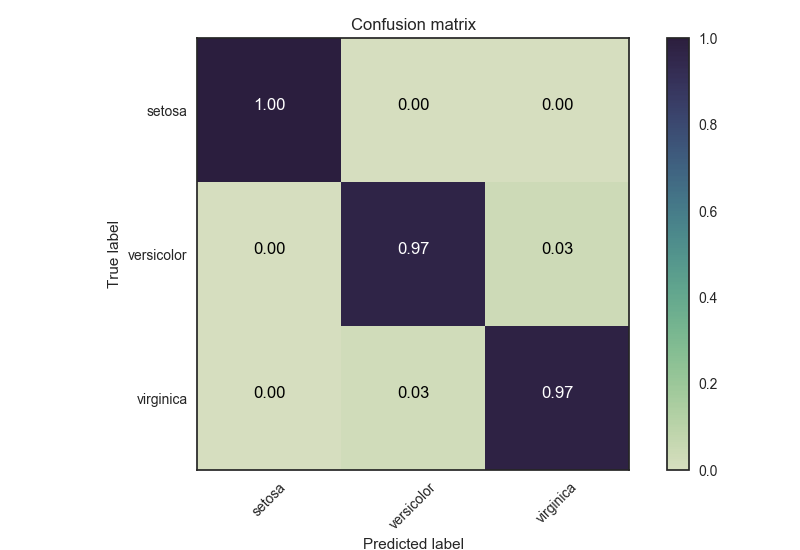

In [31]:
cm = confusion_matrix(y_train, y_train_preds)
with sns.axes_style("white"):
    plot_confusion_matrix(cm, iris.target_names, 
                          normalize = True, 
                          cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True))

# 5. Model Optimization

Previously, we set $k = 3$ for the $k$NN model, but we (rightly) asked, what is so special about 3?

Now we will examine strategies to optimize the choice model tuning parameters.

The tried and true method in this regard is brute force: perform an exhaustive grid search across all relevant tuning parameters.

In cases with many parameters (or extremely large data sets) this, and a [randomized parameter search may be more pragmatic](http://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py).

There is rarely a simple objective function that can be optimized to determine , at the end of the day this requires CPUs/GPUs and patience.

Using the `model_selection` package, we can use the [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class to perform the exhaustive search.

In this case, the relevant parameters are $k$ and $p$, the order of the [Minkowski distance](https://en.wikipedia.org/wiki/Minkowski_distance) ($p = 2$ is equivalent to Euclidean distance).

In [41]:
from sklearn.model_selection import GridSearchCV
grid_results = GridSearchCV(knn_clf, {'n_neighbors': [1, 3, 5, 10, 30, 50], 
                                      'p': [1, 2, 3]}, cv = 10)
grid_results.fit(X_train, y_train)
print("The best model uses k = {:d} and p = {:d}".format(grid_results.best_params_['n_neighbors'],
                                                          grid_results.best_params_['p']))

The best model adopts k = 3 and p = 2


Furthermore, it is useful to understand how the performance changes as a function of the parameters in the search.

In [46]:
k_grid = np.unique(grid_results.cv_results_['param_n_neighbors'])
p_grid = np.unique(grid_results.cv_results_['param_p'])
K, P = np.meshgrid(k_grid, p_grid)

score_grid = np.empty(np.shape(K))
for params, acc in zip(grid_results.cv_results_['params'], 
                       grid_results.cv_results_['mean_test_score']):

    this_source = np.where((K == params['n_neighbors']) & (P == params['p']))
    score_grid[this_source] = acc

<IPython.core.display.Javascript object>


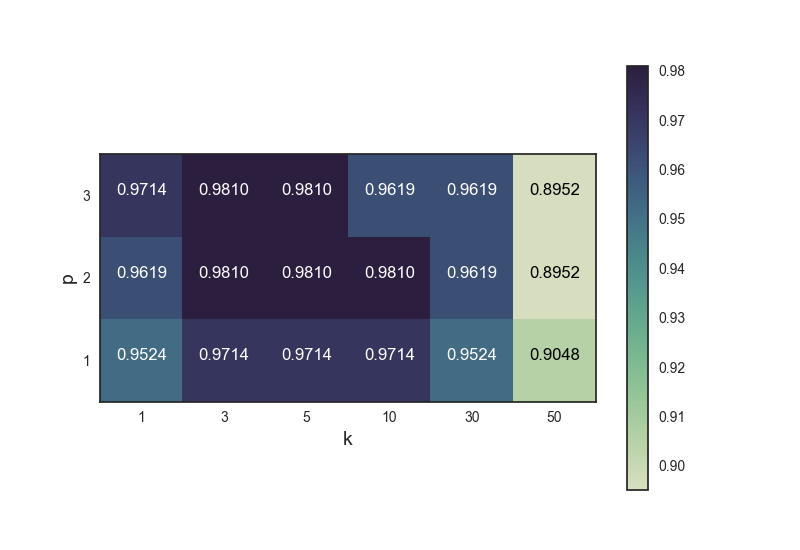

In [75]:
with sns.axes_style('white'):
    fig, ax = plt.subplots()
    im = ax.imshow(score_grid, origin = 'lower_left', 
               cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True))

    thresh = 0.92
    for i, j in itertools.product(range(score_grid.shape[0]), 
                                  range(score_grid.shape[1])):
        ax.text(j, i, format(score_grid[i, j], '.4f'),
                 horizontalalignment="center",
                 color="white" if score_grid[i, j] > thresh else "black")
    
    ax.set_xticks(np.arange(len(k_grid)))
    ax.set_xticklabels(k_grid)
    ax.set_yticks(np.arange(len(p_grid)))
    ax.set_yticklabels(p_grid)
    ax.set_xlabel('k', fontsize = 14)
    ax.set_ylabel('p', fontsize = 14)
    cb = plt.colorbar(im)

In this case we see that a range of different parameter choices provide the optimal results. Moving forward we will make predictions using models with $k = 3$ and $p = 2$.